<a href="https://colab.research.google.com/github/eternaldemon/Deep-Learning/blob/master/CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pretty excited for my first CNN code ever from scratch.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

data = tf.keras.datasets.cifar10

(x_train,y_train), (x_test, y_test) = data.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape #Shape of 1 image 
# Single image is of 32x32x3 where 3 are the no of colour formats here due to it being RGB

(32, 32, 3)

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()


In [ ]:
from tensorflow.keras.layers import Input,Conv2D,Flatten,Dense,Dropout,GlobalMaxPooling2D
from tensorflow.keras.models import Model 

#For Convo2D input is no of feature maps, (spatial dimensions of filter), strides,activation, padding
a = Input(shape=x_train[0].shape)
b = Conv2D(32, (3,3), strides = 2, activation ='relu', padding='valid')(a)
#Taking a filter size of 3x3 since pic is only of 32x32 spatial dimentions
b = Conv2D(64, (3,3), strides = 2, activation ='relu', padding ='valid')(b)
b = Conv2D(128, (3,3), strides = 2, activation ='relu', padding ='valid')(b)
b = Flatten()(b)
b = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01),activity_regularizer=tf.keras.regularizers.l2(0.005))(b)
b = Dropout(0.5)(b)
b = Dense(10,activation='softmax')(b)

model = Model(a,b)
model.summary()




Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1180672   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0     

In [ ]:

regularization_loss=tf.add_n(model.losses)
print(regularization_loss)

Tensor("AddN:0", shape=(), dtype=float32)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
temp = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =250)

Epoch 1/250
1563/1563 [==============================] - 6s 4ms/step - loss: 7.3452 - accuracy: 0.2782 - val_loss: 3.3484 - val_accuracy: 0.3547
Epoch 2/250
1563/1563 [==============================] - 6s 4ms/step - loss: 3.2920 - accuracy: 0.3715 - val_loss: 3.1935 - val_accuracy: 0.4182
Epoch 3/250
1563/1563 [==============================] - 6s 4ms/step - loss: 3.2064 - accuracy: 0.4026 - val_loss: 3.1087 - val_accuracy: 0.4494
Epoch 4/250
1563/1563 [==============================] - 6s 4ms/step - loss: 3.1534 - accuracy: 0.4205 - val_loss: 3.1206 - val_accuracy: 0.4508
Epoch 5/250
1563/1563 [==============================] - 6s 4ms/step - loss: 3.1080 - accuracy: 0.4366 - val_loss: 3.0089 - val_accuracy: 0.4806
Epoch 6/250
1563/1563 [==============================] - 6s 4ms/step - loss: 3.0818 - accuracy: 0.4472 - val_loss: 3.0483 - val_accuracy: 0.4819
Epoch 7/250
1563/1563 [==============================] - 6s 4ms/step - loss: 3.0685 - accuracy: 0.4560 - val_loss: 2.9539 - val_ac

In [ ]:
import tempfile
tmpdir = tempfile.mkdtemp()
model2= tf.saved_model.save(model, tmpdir)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/tmp5dy4veex/assets


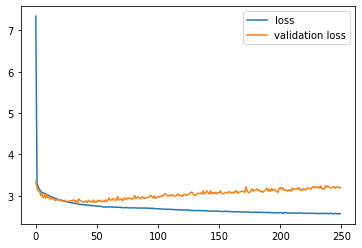

In [ ]:
plt.figure()
plt.plot(temp.history['loss'], label='loss')
plt.plot(temp.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


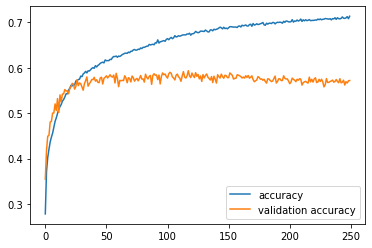

In [ ]:
plt.figure()
plt.plot(temp.history['accuracy'], label='accuracy')
plt.plot(temp.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()